# Brett Meraw

## Research question/interests
I will be specifically looking at the distribution of success rates among cards, what cards appear mostly in maindeck vs mostly in sideboard, average mana value of non-land cards, and the proportions of different types of cards (creatures, lands, sorceries, artifacts, and enchantments).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

cards = pd.read_json("https://us-central1-tumbledmtg-website.cloudfunctions.net/api/cards")

cards

,cmc,color,name,set,tablerow,text,type,tags,manacost,pt,related,layout,side
0,0,MWUBRG,TBLD Transguild Promenade,TBLD,0,This enters play tapped.\nWhen this enters pla...,Land,NaN,NaN,NaN,NaN,NaN,NaN
1,0,MWUBRG,TBLD Power Plant,TBLD,0,T: Add one mana of any color. Spend this mana ...,Land,NaN,NaN,NaN,NaN,NaN,NaN
2,0,C,TBLD Wizard Spire,TBLD,0,"When this enters play, you may reveal a Wizard...",Land,UTILITY,NaN,NaN,NaN,NaN,NaN
3,0,U,TBLD Stitchers Laboratory,TBLD,0,"As this enters play, you may reveal a Zombie c...",Land,ZOMBIE UTILITY,NaN,NaN,NaN,NaN,NaN
4,4,W,TBLD Battle Screech,TBLD,3,Create two 1/1 white Bird creature tokens with...,Sorcery,NaN,2WW,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,1,U,TBLD Annul,TBLD,3,This spell can’t be countered.\nCounter target...,Flash Sorcery,COUNTERSPELL,U,NaN,NaN,NaN,NaN
2282,1,B,TBLD Macabre Waltz,TBLD,3,Return up to two target creature cards from yo...,Sorcery,NaN,B,NaN,NaN,NaN,NaN
2283,7,R,TBLD Magma Blast,TBLD,3,This deals 7 damage to any target.\nMountaincy...,Sorcery,NaN,6R,NaN,NaN,NaN,NaN
2284,3,MBR,TBLD Night Call,TBLD,3,Return target creature card from your graveyar...,Sorcery,REANIMATE,BBR,NaN,NaN,NaN,NaN


In [2]:
import brett

cards = brett.clean_cards(cards)

cards

,cmc,color,name,type,star_score,board_ratio
1343,1,URH,TBLD Knack Charm,Flash Sorcery - Charm,0,1.000000
1602,4,U,TBLD Murk Strider,Creature - Eldrazi,0,NaN
1601,1,U,TBLD Mist Intruder,Creature - Eldrazi,0,NaN
1600,2,MUB,TBLD Fathom Feeder,Creature - Eldrazi,0,NaN
1599,3,MBR,TBLD Flayer Drone,Creature - Eldrazi,0,NaN
...,...,...,...,...,...,...
320,0,MWB,TBLD Regents Court,Land,16,1.000000
829,0,MUB,TBLD Stagnant Pools,Land - Island Swamp,16,1.000000
207,2,W,TBLD Mysterious Disappearance,Sorcery,17,0.416667
903,2,B,TBLD Backstab,Sorcery,22,0.000000


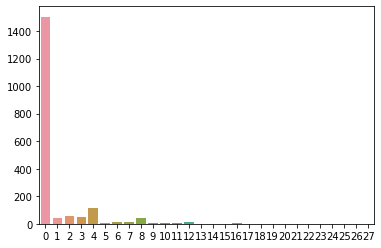

In [3]:
import math

winner_cards = cards.loc[lambda x: x['star_score'] > 0]

stardata = {}
for i in range(cards['star_score'].max() + 1):
    stardata[str(i)] = [len(cards.loc[lambda x: x['star_score'] == i].index)]

plot = sns.barplot(data = pd.DataFrame.from_dict(stardata))

### Distribution of Star Scores
Each card has a different 'star score' based on how many decks using the card have been successful in a tournament. For example, if a 1-star deck makes use of three copies of a given card, that card's star score is increased by 3. If a 2-star deck makes use of four copies of a given card, that card's star score is increased by 8.
We can see from the graph that the vast majority of cards have not been used in a successful tournament deck even once. A version of the graph which ommits this data to make the rest of the data more readable can be found below:

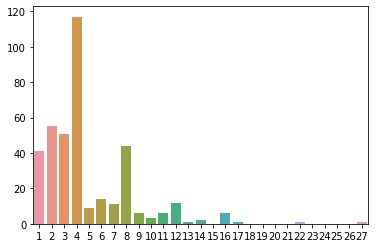

In [4]:
stardata.pop('0', None)

plot = sns.barplot(data = pd.DataFrame.from_dict(stardata))

### Distribution of Star Scores Continued
There are a few outliers that have seen heavy play in tournament winning decks. However, for the most part there are very few cards that are massively over-represented among successful decks. There appears to be a wide pool of cards showing up on the podium, so-to-speak.

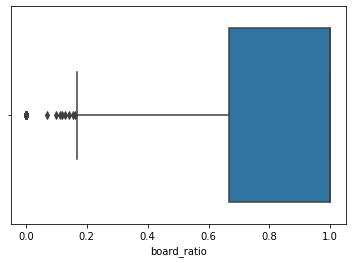

In [14]:
board_cards = cards.loc[lambda x: x['board_ratio'] != float("NaN")]

plot = sns.boxplot(x='board_ratio', data = board_cards)

### Distribution of Mainboard usage versus Sideboard usage

When players use the cards in this dataset to play against eachother, they include the cards in either their 'mainboard' or their 'sideboard'. The mainboard cards are used every game, but the sideboard cards are brought as niche tools only to be used against certain opponents.

The box plot above shows that most cards are either used in the mainboard or the sideboard, with virtually no cards seeing equal use in both. Also, most cards are exclusively used as mainboard cards, with a comparably smaller pool of cards being used as sideboard cards. This suggests that decks with very different mainboard may often have very similar sideboards.

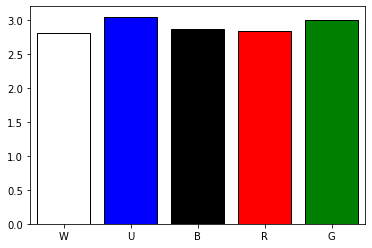

In [49]:
colors = ["W","U","B","R","G"]
count = [0,0,0,0,0]
cmc = [0,0,0,0,0]
for index, color in enumerate(colors):
    for index2,row in cards.iterrows():
        if "Land" in row['type']:
            continue
        if color in row['color']:
            count[index] +=1
            cmc[index] += row['cmc']
colorcmc = {}
for i in range(5):
    colorcmc[colors[i]] = [cmc[i]/count[i]]
    
barcolors=['white','blue','black','red','green']
plot = sns.barplot(data = pd.DataFrame.from_dict(colorcmc))
for i, bar in enumerate(plot.patches):
    bar.set_color(barcolors[i])
    bar.set_edgecolor("black")

### Average Mana Value for each Color

There are five card colors in Magic: the Gathering: white, blue, black, red, green. Note that cards can be more than one color.

The bar graph above compares the average mana value of each color. They appear to be quite similar, though blue and green cards seem to be chunkier on average than those of other colors.

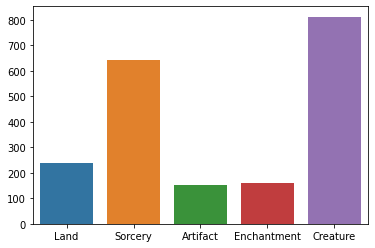

In [53]:
cardtypes = ["Land", "Sorcery", "Artifact", "Enchantment", "Creature"]
count = [0,0,0,0,0]

for index, typeentry in enumerate(cardtypes):
    for index2, row in cards.iterrows():
        if typeentry in row['type']:
            count[index] += 1

typecount = {}
for i in range(5):
    typecount[cardtypes[i]] = [count[i]]
plot = sns.barplot(data = pd.DataFrame.from_dict(typecount))

### Card Type Distribution

The above graph shows the distribution of card types in the data set. Every card has at least one type. Some cards are more than one type, though the vast majority of cards are only one type. There are no sorcery cards that are also another type.

We can see from the graph that sorcery and creature cards are the most common.